In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from itertools import combinations
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(sys.path)

['C:\\Users\\Mi\\Documents\\Diploma\\GMDH', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38\\python38.zip', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38\\DLLs', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38\\lib', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38', '', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38\\lib\\site-packages', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\win32', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\win32\\lib', 'c:\\users\\mi\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\Pythonwin']


In [4]:
sys.path.insert(1, "C:/Users/Mi/Documents/Diploma/GMDH/build/Release/gmdhpy.cp38-win_amd64.pyd")

In [2]:
import build.Release.gmdhpy as gm

In [3]:
dir(gm)

['COMBI',
 'Criterion',
 'GMDH',
 'RegularityCriterion',
 'RegularityCriterionTS',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'convertToTimeSeries',
 'splitData',
 'splitTsData',
 'splitted_data']

In [44]:
def regression(x, lags, validate_size, test_size):
    print("x:", x)
    x_data = list()
    y_data = list()
    for i in range(len(x) - lags):
        x_data.append(x[i:i+lags])
        y_data.append(x[i+lags])
    x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=validate_size, shuffle=False)
    x_train = np.array(x_train)
    x_val = np.array(x_val)
    #print("x_train:\n", x_train)
    #print("y_train:\n", y_train)
    #print("x_val:\n", x_val)
    #print("y_val:\n", y_val)
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_size, shuffle=False)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    coeffs = list(lr.coef_)
    coeffs.append(lr.intercept_)
    coeffs = [round(coeff, 6) for coeff in coeffs]
    y_pred = lr.predict(x_val)
    error = round(mean_squared_error(y_pred, y_val), 6)
    print("best_coeffs:\n", coeffs)
    return y_pred
    #print("y_pred:\n", y_pred)

In [64]:
[list(i) for i in combinations([1, 2, 3, 4], 2)]

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]

In [3]:
def regression_combi(x, lags, validate_size, test_size):
    #print("x:", x)
    x_data = list()
    y_data = list()
    for i in range(len(x) - lags):
        x_data.append(list(x.values[i:i+lags]))
        y_data.append(x.values[i+lags])
    x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=validate_size, shuffle=False)
    x_train = np.array(x_train)
    x_val = np.array(x_val)
    #print("x_train:\n", x_train)
    #print("y_train:\n", y_train)
    #print("x_val:\n", x_val)
    #print("y_val:\n", y_val)
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_size, shuffle=False)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    lr = LinearRegression(n_jobs=-1)
    last_error = 100000000000000
    best_coeffs = []
    best_polynom = []
    for level in range(1, x_train.shape[1] + 1):
        errors = []
        for comb in combinations(range(x_train.shape[1]), level):
            lr.fit(x_train[:, comb], y_train)
            coeffs = list(lr.coef_)
            coeffs.append(lr.intercept_)
            coeffs = [round(coeff, 6) for coeff in coeffs]
            y_pred = lr.predict(x_test[:, comb])
            error = round(mean_squared_error(y_pred, y_test), 6)
            comb = list(comb)
            comb.append(lags)
            errors.append((error, coeffs, comb))
        errors.sort()
        #print(errors[0])
        if last_error > errors[0][0]:
            last_error = errors[0][0]
            best_coeffs = errors[0][1]
            best_polynom = errors[0][2]
        else:
            break
    best_polynom_str = "y ="
    for i in range(len(best_polynom)):
        if best_coeffs[i] > 0:
            if i > 0:
                best_polynom_str += " + "
            else:
                best_polynom_str += " "
        else:
            best_polynom_str += " - "
        best_polynom_str += str(abs(best_coeffs[i]))
        if i != len(best_coeffs) - 1:
            best_polynom_str += "*x" + str(best_polynom[i] + 1)
    print(best_polynom_str)
    #print("best_polynom:\n", best_polynom)
    #print("best_coeffs:\n", best_coeffs)
    y_pred = lr.fit(x_train[:, best_polynom[:-1]], y_train).predict(x_val[:, best_polynom[:-1]])
    #print("y_pred:\n", y_pred)
    return y_pred

In [22]:
x = [8, 5, 323, 5, 8, 21, 2, 5, 98, 11]
x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lags = 5
validate_size = 0.33
test_size = 0.33

In [23]:
regression_combi(x2, lags, validate_size, test_size)

x: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_train:
 [[1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]]
y_train:
 [6, 7, 8]
x_val:
 [[4 5 6 7 8]
 [5 6 7 8 9]]
y_val:
 [9, 10]
best_polynom:
 (4,)
best_coeffs:
 [1.0, 1.0]
y_pred:
 [ 9. 10.]


In [28]:
mat, vec = gm.convertToTimeSeries(x2, lags)
splited_data = gm.splitTsData(mat, vec, validate_size)

combi = gm.COMBI()
combi.fit(splited_data.x_train, splited_data.y_train, gm.RegularityCriterionTS(test_size))

print(combi.getBestPolymon())
print(combi.predict(splited_data.x_test))

y = 1.000000*x2 + 4.000000
[ 9. 10.]


In [4]:
%%time
data = pd.read_csv("Sberbank.csv")['close'][50000:]
lags = 10
test_size = 0.33
validate_size = 0.2

CPU times: total: 172 ms
Wall time: 166 ms


In [5]:
%%time
mat, vec = gm.convertToTimeSeries(data, lags)
splited_data = gm.splitTsData(mat, vec, validate_size)

combi = gm.COMBI()

CPU times: total: 15.6 ms
Wall time: 13 ms


In [6]:
%%time
combi.fit(splited_data.x_train, splited_data.y_train, gm.RegularityCriterionTS(test_size), 1, 1);

CPU times: total: 5.3 s
Wall time: 6.71 s


In [39]:
%%time
print(combi.getBestPolymon())

y = - 0.015762*x6 + 0.011931*x7 + 0.022787*x9 + 0.980976*x10 + 0.014980
CPU times: total: 0 ns
Wall time: 0 ns


In [26]:
%%time
y_pred_lr = regression_combi(data, lags, validate_size, test_size)

y = - 0.015762*x6 + 0.011931*x7 + 0.022788*x9 + 0.980975*x10 + 0.014977
CPU times: total: 14.1 s
Wall time: 14.2 s


In [27]:
data[:10]

50000    75.80
50001    75.78
50002    75.86
50003    75.97
50004    76.50
50005    76.87
50006    76.88
50007    76.79
50008    76.84
50009    76.80
Name: close, dtype: float64

In [131]:
np.savetxt("Sber.csv", np.asarray(data.values), delimiter=",")

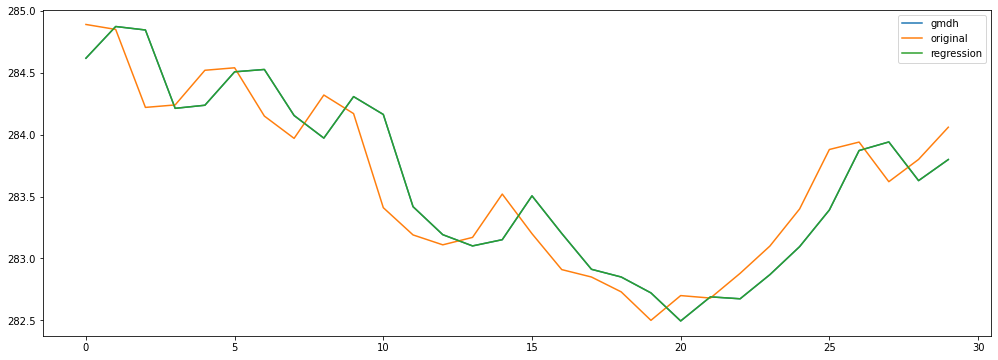

In [41]:
n = 30
plt.figure(figsize=(17, 6))
sns.lineplot(x=np.arange(n), y=combi.predict(splited_data.x_test)[:n], label='gmdh');
sns.lineplot(x=np.arange(n), y=splited_data.y_test[:n], label='original');
sns.lineplot(x=np.arange(n), y=y_pred_lr[:n], label='regression');